## Import Libraries:

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib

In [38]:
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Pandas version: 2.2.3
Matplotlib version: 3.9.2


## Config:

In [39]:
pd.options.mode.copy_on_write = True

## Preprocess Data:

In [40]:
JESTER_DATASET_DIR_PATH = os.path.join("..", "..", "datasets") # Path to dataset directory
TRAIN_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "jester-v1-train.csv")
VAL_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "jester-v1-validation.csv")
TEST_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "labeled-test.csv")
VIDEO_DIR_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "jester_Dataset")
column_names = ["video_id", "label"]
train_df = pd.read_csv(TRAIN_INFO_PATH, names=column_names, header=None, delimiter=";")
val_df = pd.read_csv(VAL_INFO_PATH, names=column_names, header=None, delimiter=";")
test_df = pd.read_csv(TEST_INFO_PATH, names=['video_id', 'label_id', "label"], header=None, delimiter=";")

In [41]:
train_df

,video_id,label
0,34870,Drumming Fingers
1,56557,Sliding Two Fingers Right
2,129112,Sliding Two Fingers Down
3,63861,Pulling Two Fingers In
4,131717,Sliding Two Fingers Up
...,...,...
118557,75507,Swiping Down
118558,48433,Sliding Two Fingers Left
118559,146421,Sliding Two Fingers Right
118560,49514,Thumb Up


In [42]:
val_df

,video_id,label
0,9223,Thumb Up
1,107090,Pushing Two Fingers Away
2,42920,Swiping Left
3,106485,Thumb Down
4,142201,Rolling Hand Backward
...,...,...
14782,97044,Drumming Fingers
14783,136208,Sliding Two Fingers Right
14784,12180,Rolling Hand Backward
14785,119381,Thumb Down


In [43]:
test_df

,video_id,label_id,label
0,109621,8,NaN
1,145149,26,NaN
2,53606,13,NaN
3,1417,0,NaN
4,136684,23,NaN
...,...,...,...
14738,143716,26,NaN
14739,102605,2,NaN
14740,36448,6,NaN
14741,125031,13,NaN


#### Amount of probes:

In [44]:
len(train_df) + len(val_df) + len(test_df)

148092

#### Jester Dataset Classes:

In [45]:
jester_labels = {}
jester_labels_id = {}
with open(os.path.join(JESTER_DATASET_DIR_PATH, "info", 'jester-v1-labels.csv')) as f:
    for idx2, line in enumerate(f):
        jester_labels[line.strip()] = idx2
        jester_labels_id[idx2] = line.strip()

In [46]:

jester_labels

{'Swiping Left': 0,
 'Swiping Right': 1,
 'Swiping Down': 2,
 'Swiping Up': 3,
 'Pushing Hand Away': 4,
 'Pulling Hand In': 5,
 'Sliding Two Fingers Left': 6,
 'Sliding Two Fingers Right': 7,
 'Sliding Two Fingers Down': 8,
 'Sliding Two Fingers Up': 9,
 'Pushing Two Fingers Away': 10,
 'Pulling Two Fingers In': 11,
 'Rolling Hand Forward': 12,
 'Rolling Hand Backward': 13,
 'Turning Hand Clockwise': 14,
 'Turning Hand Counterclockwise': 15,
 'Zooming In With Full Hand': 16,
 'Zooming Out With Full Hand': 17,
 'Zooming In With Two Fingers': 18,
 'Zooming Out With Two Fingers': 19,
 'Thumb Up': 20,
 'Thumb Down': 21,
 'Shaking Hand': 22,
 'Stop Sign': 23,
 'Drumming Fingers': 24,
 'No gesture': 25,
 'Doing other things': 26}

In [47]:
jester_labels_id

{0: 'Swiping Left',
 1: 'Swiping Right',
 2: 'Swiping Down',
 3: 'Swiping Up',
 4: 'Pushing Hand Away',
 5: 'Pulling Hand In',
 6: 'Sliding Two Fingers Left',
 7: 'Sliding Two Fingers Right',
 8: 'Sliding Two Fingers Down',
 9: 'Sliding Two Fingers Up',
 10: 'Pushing Two Fingers Away',
 11: 'Pulling Two Fingers In',
 12: 'Rolling Hand Forward',
 13: 'Rolling Hand Backward',
 14: 'Turning Hand Clockwise',
 15: 'Turning Hand Counterclockwise',
 16: 'Zooming In With Full Hand',
 17: 'Zooming Out With Full Hand',
 18: 'Zooming In With Two Fingers',
 19: 'Zooming Out With Two Fingers',
 20: 'Thumb Up',
 21: 'Thumb Down',
 22: 'Shaking Hand',
 23: 'Stop Sign',
 24: 'Drumming Fingers',
 25: 'No gesture',
 26: 'Doing other things'}

#### Apply label id to probes:

In [48]:
train_df["label_id"] = train_df["label"].apply(lambda label: jester_labels.get(label))
val_df["label_id"] = val_df["label"].apply(lambda label: jester_labels.get(label))
test_df["label"] = test_df["label_id"].apply(lambda label_id: jester_labels_id.get(label_id))

In [49]:
train_df

,video_id,label,label_id
0,34870,Drumming Fingers,24
1,56557,Sliding Two Fingers Right,7
2,129112,Sliding Two Fingers Down,8
3,63861,Pulling Two Fingers In,11
4,131717,Sliding Two Fingers Up,9
...,...,...,...
118557,75507,Swiping Down,2
118558,48433,Sliding Two Fingers Left,6
118559,146421,Sliding Two Fingers Right,7
118560,49514,Thumb Up,20


In [50]:
val_df

,video_id,label,label_id
0,9223,Thumb Up,20
1,107090,Pushing Two Fingers Away,10
2,42920,Swiping Left,0
3,106485,Thumb Down,21
4,142201,Rolling Hand Backward,13
...,...,...,...
14782,97044,Drumming Fingers,24
14783,136208,Sliding Two Fingers Right,7
14784,12180,Rolling Hand Backward,13
14785,119381,Thumb Down,21


In [51]:
test_df

,video_id,label_id,label
0,109621,8,Sliding Two Fingers Down
1,145149,26,Doing other things
2,53606,13,Rolling Hand Backward
3,1417,0,Swiping Left
4,136684,23,Stop Sign
...,...,...,...
14738,143716,26,Doing other things
14739,102605,2,Swiping Down
14740,36448,6,Sliding Two Fingers Left
14741,125031,13,Rolling Hand Backward


#### Apply Images Directory Path To Probes:

In [52]:
def create_path(main_path: str, dir_name: str) -> str:
    return os.path.join(main_path, dir_name)

In [53]:
def get_directory_path(catalog_id, main_directory, batch_size):
    batch_num = (catalog_id - 1) // batch_size + 1
    batch_dir = f"kat{batch_num}"
    directory_path = os.path.join(main_directory, batch_dir, str(catalog_id))
    return directory_path

In [54]:
train_df["path"] = train_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))
val_df["path"] = val_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))
test_df["path"] = test_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))

In [55]:
train_df

,video_id,label,label_id,path
0,34870,Drumming Fingers,24,../../datasets/jester_Dataset/kat4/34870
1,56557,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat7/56557
2,129112,Sliding Two Fingers Down,8,../../datasets/jester_Dataset/kat15/129112
3,63861,Pulling Two Fingers In,11,../../datasets/jester_Dataset/kat8/63861
4,131717,Sliding Two Fingers Up,9,../../datasets/jester_Dataset/kat15/131717
...,...,...,...,...
118557,75507,Swiping Down,2,../../datasets/jester_Dataset/kat9/75507
118558,48433,Sliding Two Fingers Left,6,../../datasets/jester_Dataset/kat6/48433
118559,146421,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat17/146421
118560,49514,Thumb Up,20,../../datasets/jester_Dataset/kat6/49514


In [56]:
val_df

,video_id,label,label_id,path
0,9223,Thumb Up,20,../../datasets/jester_Dataset/kat2/9223
1,107090,Pushing Two Fingers Away,10,../../datasets/jester_Dataset/kat12/107090
2,42920,Swiping Left,0,../../datasets/jester_Dataset/kat5/42920
3,106485,Thumb Down,21,../../datasets/jester_Dataset/kat12/106485
4,142201,Rolling Hand Backward,13,../../datasets/jester_Dataset/kat16/142201
...,...,...,...,...
14782,97044,Drumming Fingers,24,../../datasets/jester_Dataset/kat11/97044
14783,136208,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat16/136208
14784,12180,Rolling Hand Backward,13,../../datasets/jester_Dataset/kat2/12180
14785,119381,Thumb Down,21,../../datasets/jester_Dataset/kat14/119381


In [57]:
test_df

,video_id,label_id,label,path
0,109621,8,Sliding Two Fingers Down,../../datasets/jester_Dataset/kat13/109621
1,145149,26,Doing other things,../../datasets/jester_Dataset/kat17/145149
2,53606,13,Rolling Hand Backward,../../datasets/jester_Dataset/kat6/53606
3,1417,0,Swiping Left,../../datasets/jester_Dataset/kat1/1417
4,136684,23,Stop Sign,../../datasets/jester_Dataset/kat16/136684
...,...,...,...,...
14738,143716,26,Doing other things,../../datasets/jester_Dataset/kat16/143716
14739,102605,2,Swiping Down,../../datasets/jester_Dataset/kat12/102605
14740,36448,6,Sliding Two Fingers Left,../../datasets/jester_Dataset/kat5/36448
14741,125031,13,Rolling Hand Backward,../../datasets/jester_Dataset/kat14/125031


In [58]:
test_df.apply(lambda x: x["label_id"] + x["path"])

KeyError: 'label_id'

#### Turning Labels Dict Into DataFrame:

In [59]:
mapped_labels = train_df[["label", "label_id"]].drop_duplicates().sort_values(by=["label_id"])

In [60]:
mapped_labels

,label,label_id
33,Swiping Left,0
8,Swiping Right,1
12,Swiping Down,2
110,Swiping Up,3
17,Pushing Hand Away,4
6,Pulling Hand In,5
36,Sliding Two Fingers Left,6
1,Sliding Two Fingers Right,7
2,Sliding Two Fingers Down,8
4,Sliding Two Fingers Up,9


#### Get Sequence length:

In [61]:
def get_sequence_len(path: str) -> int:
    return len([file for file in os.listdir(path) if file.endswith(".jpg")])

In [62]:
train_df["seq_len"] = train_df["path"].apply(lambda path: get_sequence_len(path))
val_df["seq_len"] = val_df["path"].apply(lambda path: get_sequence_len(path))
test_df["seq_len"] = test_df["path"].apply(lambda path: get_sequence_len(path))

In [63]:
train_df

,video_id,label,label_id,path,seq_len
0,34870,Drumming Fingers,24,../../datasets/jester_Dataset/kat4/34870,37
1,56557,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat7/56557,37
2,129112,Sliding Two Fingers Down,8,../../datasets/jester_Dataset/kat15/129112,37
3,63861,Pulling Two Fingers In,11,../../datasets/jester_Dataset/kat8/63861,37
4,131717,Sliding Two Fingers Up,9,../../datasets/jester_Dataset/kat15/131717,34
...,...,...,...,...,...
118557,75507,Swiping Down,2,../../datasets/jester_Dataset/kat9/75507,37
118558,48433,Sliding Two Fingers Left,6,../../datasets/jester_Dataset/kat6/48433,37
118559,146421,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat17/146421,33
118560,49514,Thumb Up,20,../../datasets/jester_Dataset/kat6/49514,36


In [64]:
val_df

,video_id,label,label_id,path,seq_len
0,9223,Thumb Up,20,../../datasets/jester_Dataset/kat2/9223,35
1,107090,Pushing Two Fingers Away,10,../../datasets/jester_Dataset/kat12/107090,37
2,42920,Swiping Left,0,../../datasets/jester_Dataset/kat5/42920,33
3,106485,Thumb Down,21,../../datasets/jester_Dataset/kat12/106485,36
4,142201,Rolling Hand Backward,13,../../datasets/jester_Dataset/kat16/142201,38
...,...,...,...,...,...
14782,97044,Drumming Fingers,24,../../datasets/jester_Dataset/kat11/97044,37
14783,136208,Sliding Two Fingers Right,7,../../datasets/jester_Dataset/kat16/136208,37
14784,12180,Rolling Hand Backward,13,../../datasets/jester_Dataset/kat2/12180,40
14785,119381,Thumb Down,21,../../datasets/jester_Dataset/kat14/119381,37


In [65]:
test_df

,video_id,label_id,label,path,seq_len
0,109621,8,Sliding Two Fingers Down,../../datasets/jester_Dataset/kat13/109621,36
1,145149,26,Doing other things,../../datasets/jester_Dataset/kat17/145149,38
2,53606,13,Rolling Hand Backward,../../datasets/jester_Dataset/kat6/53606,38
3,1417,0,Swiping Left,../../datasets/jester_Dataset/kat1/1417,37
4,136684,23,Stop Sign,../../datasets/jester_Dataset/kat16/136684,37
...,...,...,...,...,...
14738,143716,26,Doing other things,../../datasets/jester_Dataset/kat16/143716,37
14739,102605,2,Swiping Down,../../datasets/jester_Dataset/kat12/102605,36
14740,36448,6,Sliding Two Fingers Left,../../datasets/jester_Dataset/kat5/36448,37
14741,125031,13,Rolling Hand Backward,../../datasets/jester_Dataset/kat14/125031,37


#### Save DataFrames to CSV File Format:

In [66]:
train_df.to_csv(os.path.join(JESTER_DATASET_DIR_PATH, "info", "train_df.csv"), index=False)
val_df.to_csv(os.path.join(JESTER_DATASET_DIR_PATH, "info", "val_df.csv"), index=False)
test_df.to_csv(os.path.join(JESTER_DATASET_DIR_PATH, "info", "test_df.csv"), index=False)

## Plot Dataset Info:

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hubertmaka/Desktop/Inżynierka/GestureRecognition/code/gesture-recognition/dataset_plots/cls_dist_train.jpg'

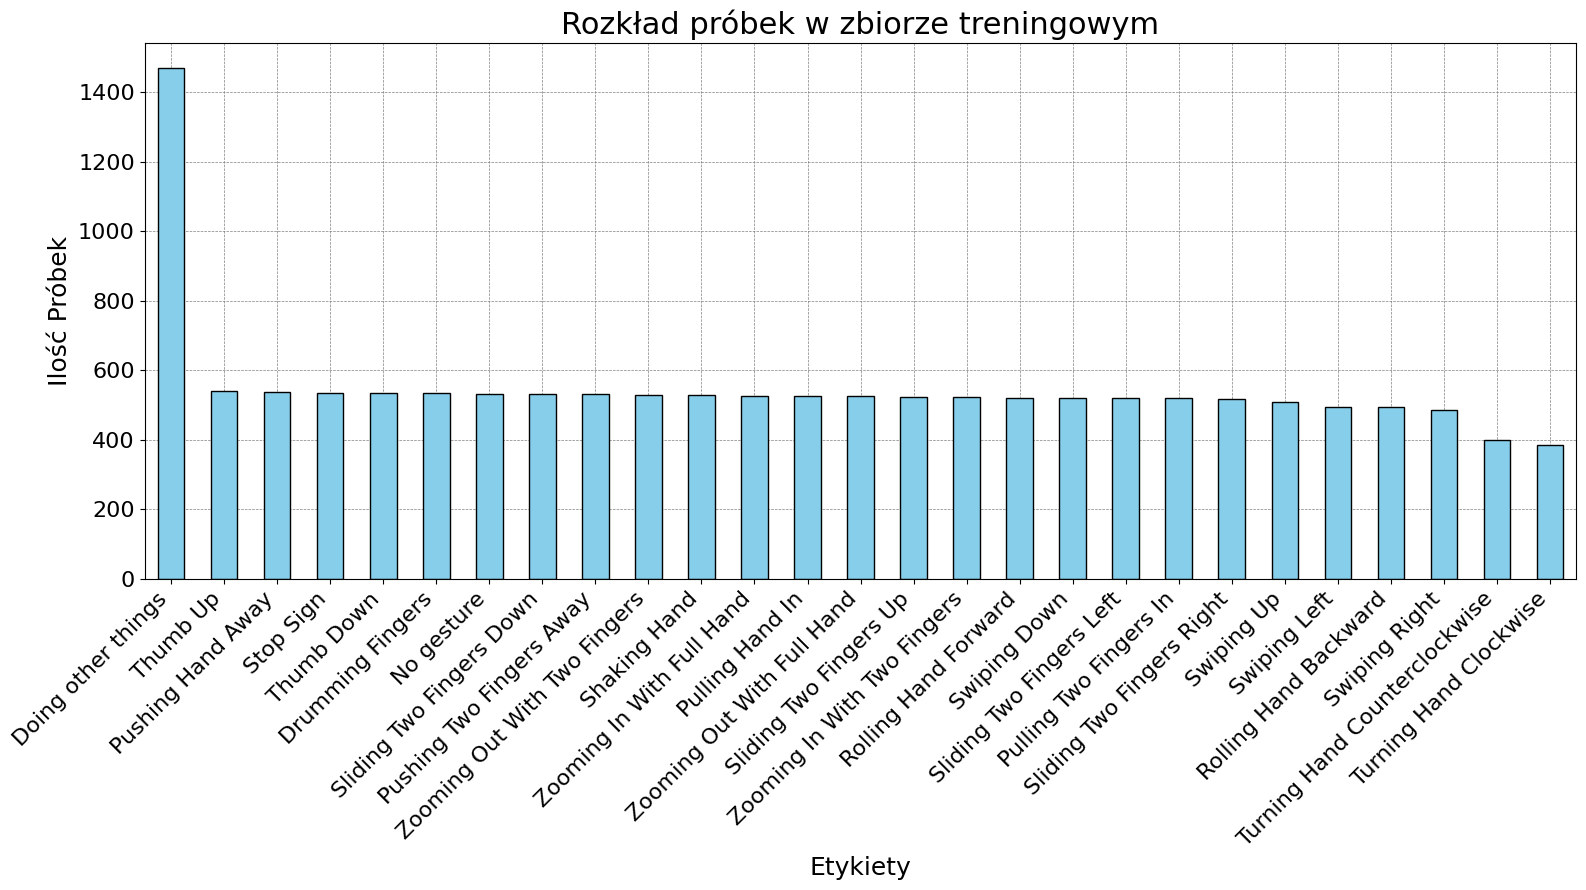

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
val_df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Etykiety', fontsize=18)
plt.ylabel('Ilość Próbek', fontsize=18)
plt.title('Rozkład próbek w zbiorze treningowym', fontsize=22)
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.tight_layout()
plt.savefig("dataset_plots/cls_dist_train.jpg", dpi=300)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hubertmaka/Desktop/Inżynierka/GestureRecognition/code/gesture-recognition/dataset_plots/cls_dist_validation.jpg'

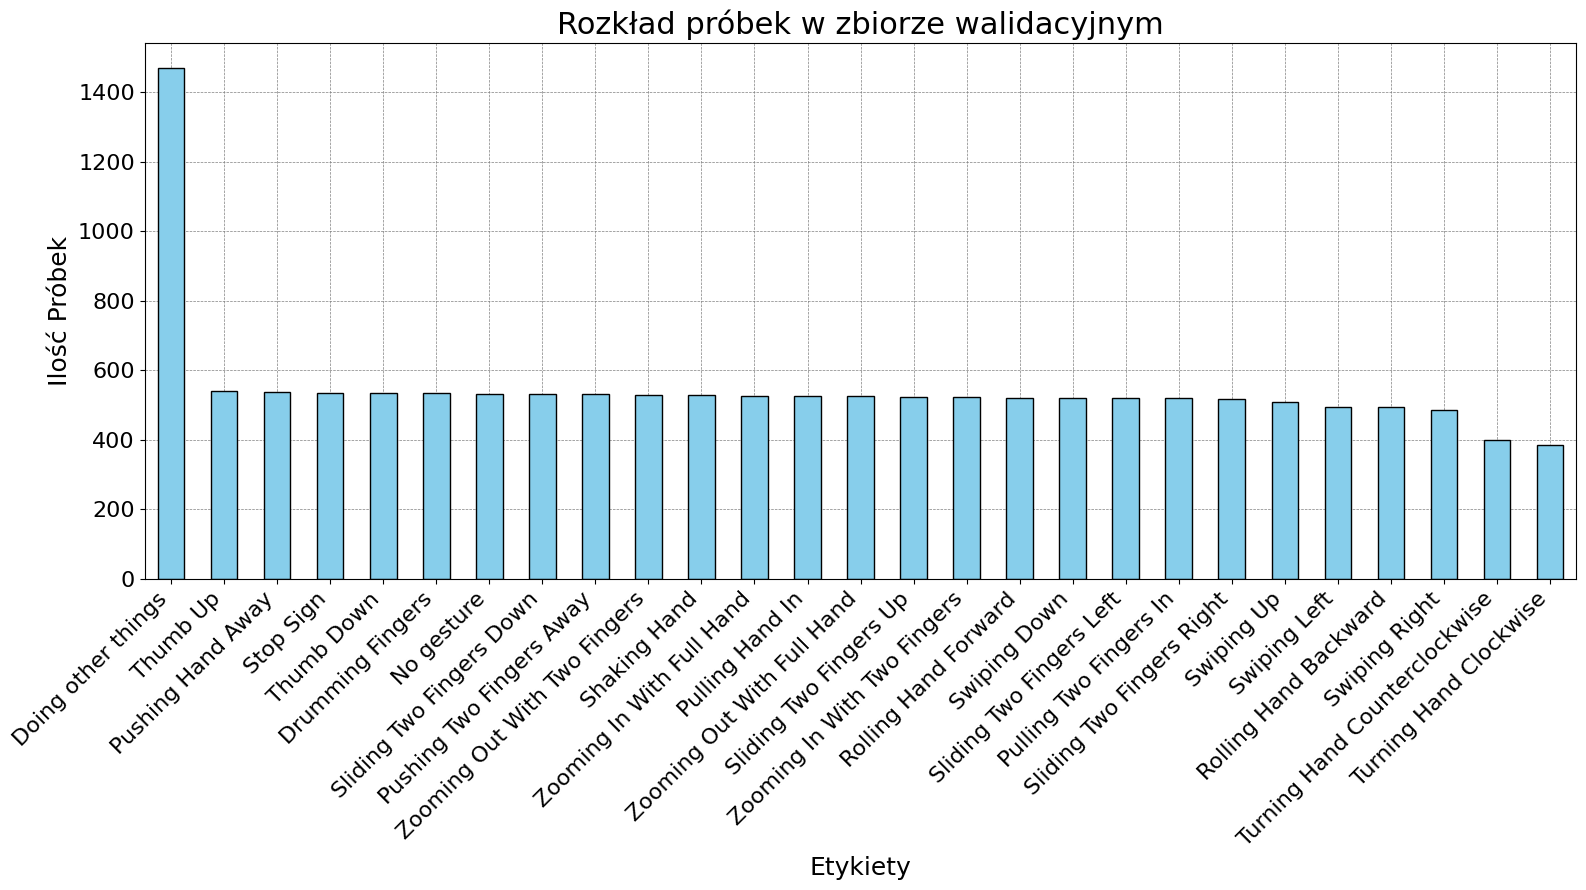

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
val_df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Etykiety', fontsize=18)
plt.ylabel('Ilość Próbek', fontsize=18)
plt.title('Rozkład próbek w zbiorze walidacyjnym', fontsize=22)
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.tight_layout()
plt.savefig("dataset_plots/cls_dist_validation.jpg", dpi=300)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hubertmaka/Desktop/Inżynierka/GestureRecognition/code/gesture-recognition/jester_plots/cls_dist_test.jpg'

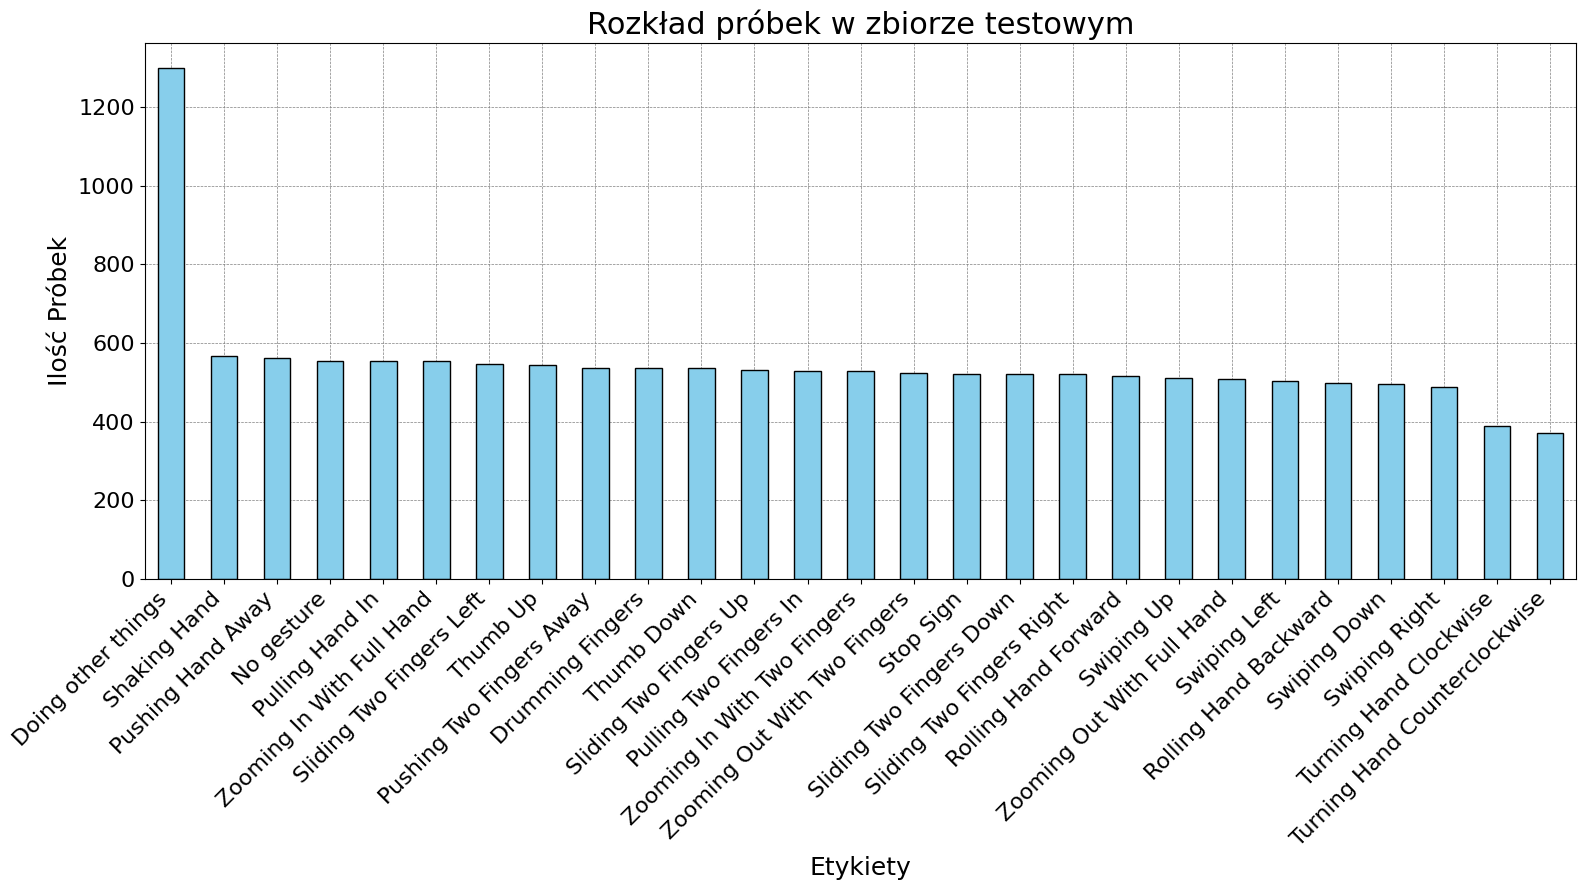

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
test_df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Etykiety', fontsize=18)
plt.ylabel('Ilość Próbek', fontsize=18)
plt.title('Rozkład próbek w zbiorze testowym', fontsize=22)
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.tight_layout()
plt.savefig("dataset_plots/cls_dist_test.jpg", dpi=300)
plt.show()


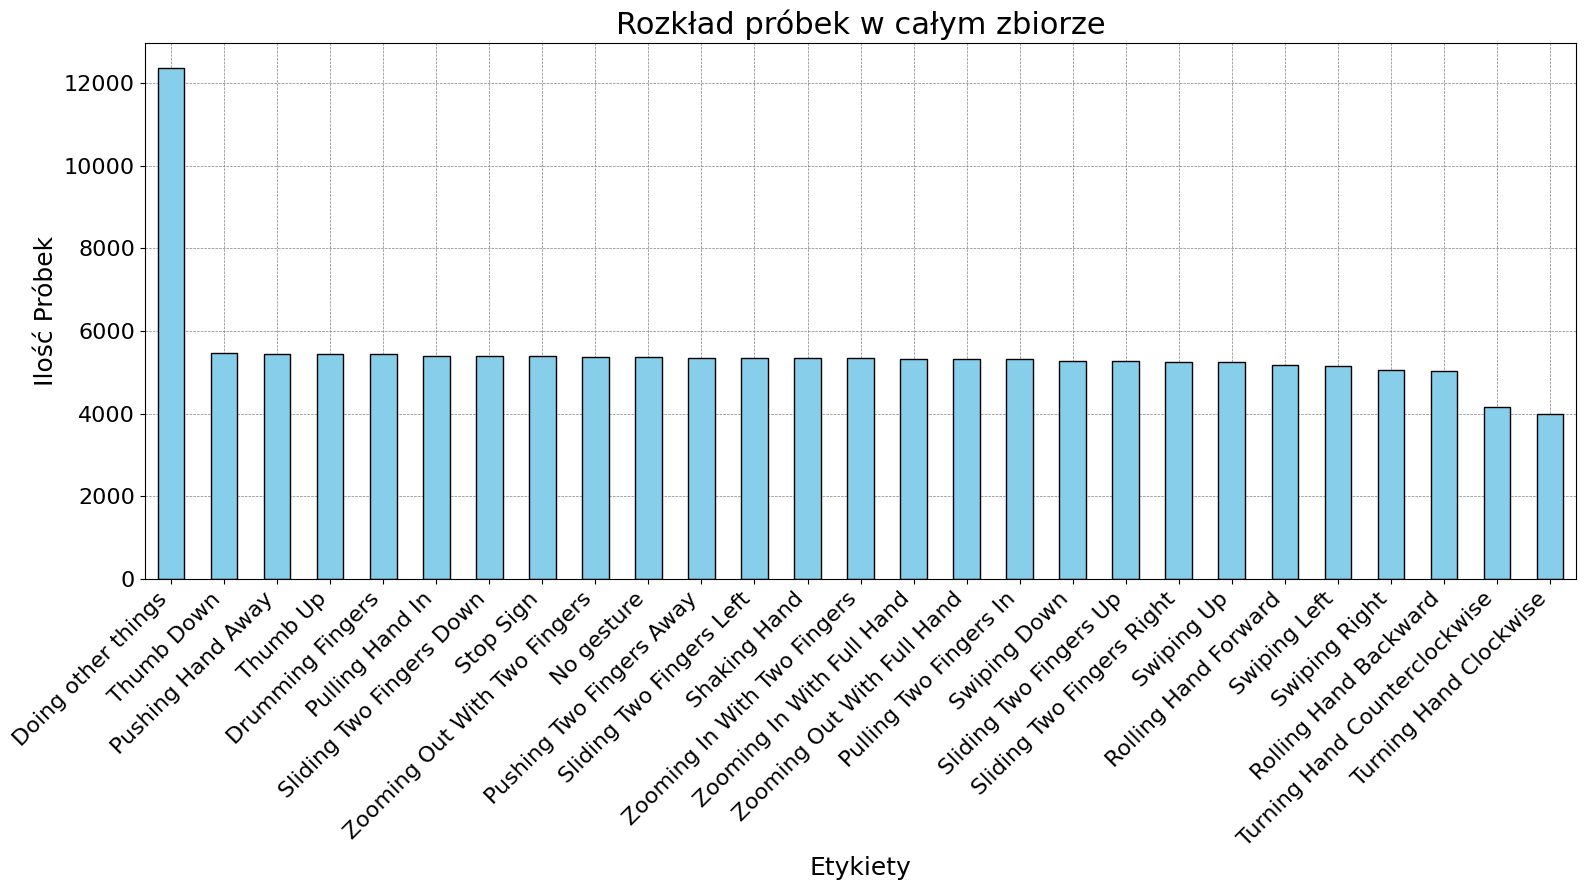

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

all_df = pd.concat([train_df, val_df, test_df])

plt.figure(figsize=(16, 9))
all_df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Etykiety', fontsize=18)
plt.ylabel('Ilość Próbek', fontsize=18)
plt.title('Rozkład próbek w całym zbiorze', fontsize=22)
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.tight_layout()
plt.savefig("dataset_plots/cls_dist_all.jpg", dpi=300)
plt.show()


In [37]:
all_df["seq_len"].sort_values(ascending=False)

39876    70
49083    69
14757    67
5123     65
94723    63
         ..
40602    13
10220    13
10070    13
62516    12
66116    12
Name: seq_len, Length: 148092, dtype: int64

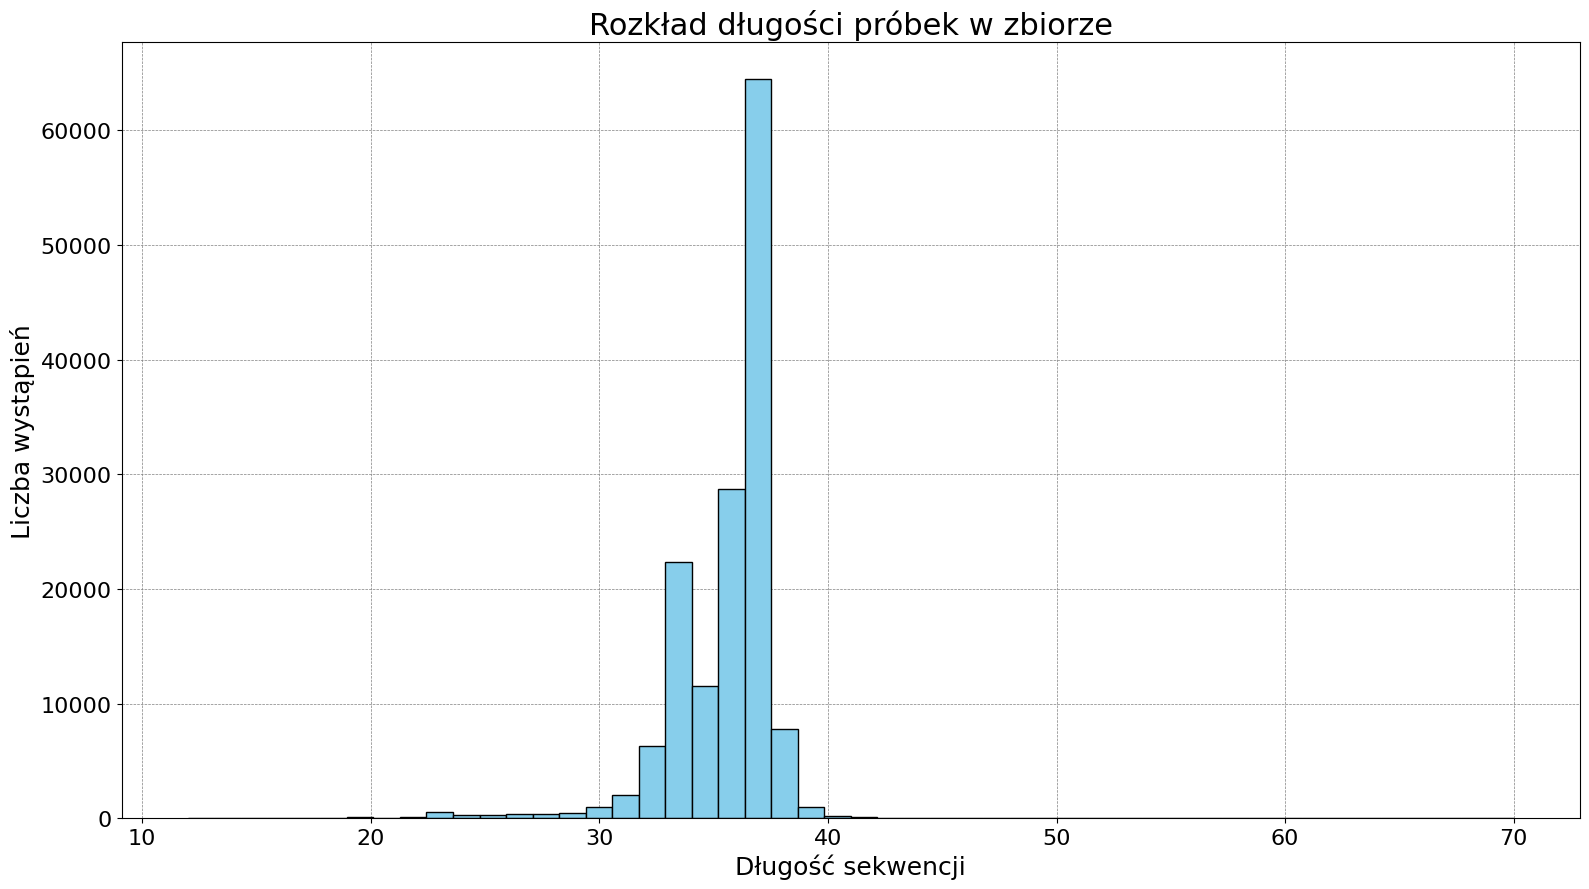

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
all_df['seq_len'].hist(bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Długość sekwencji', fontsize=18)
plt.ylabel('Liczba wystąpień', fontsize=18)
plt.title('Rozkład długości próbek w zbiorze', fontsize=22)
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig("dataset_plots/seq_len_distribution.jpg", dpi=300)
plt.show()


#### Dataset Info:

In [54]:
print(f"Mean Sequence Length In Train Dataset: {train_df['seq_len'].mean()}")
print(f"Mean Sequence Length In Validation Dataset: {val_df['seq_len'].mean()}")

Mean Sequence Length In Train Dataset: 35.58602250299421
Mean Sequence Length In Validation Dataset: 36.01663623453033


In [55]:
print(f"Min sequence len in all dataset: {min(all_df['seq_len'])}")
print(f"Max sequence len in all dataset: {max(all_df['seq_len'])}")

Min sequence len in all dataset: 12
Max sequence len in all dataset: 70


## Show Videos (labeling):

In [ ]:
import cv2
import os

break_all = False
for idx, row in test_df.iterrows():
    images = sorted([os.path.join(row["path"], img) for img in os.listdir(row["path"]) if img.endswith(".jpg")])
    for image_path in images:
        frame = cv2.imread(image_path)
        frame = cv2.resize(frame, (500, 500))
        if frame is None:
            print(f"Error during loading image {image_path}")
            continue

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        cv2.imshow(f"Image {row['video_id']}", frame)
        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break_all = True
            break

    print("Press any key to continue to the next set of images or 'q' to quit.")
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break_all = True

    cv2.destroyAllWindows()
    if break_all:
        break

cv2.destroyAllWindows()